## Import the Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

/Users/mananparasher/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Download Dataset 

In [93]:
!wget https://raw.githubusercontent.com/mananparasher/PML-Machine-Learning-Datasets/master/titanic_dataset.csv

--2020-07-21 18:27:11--  https://raw.githubusercontent.com/mananparasher/PML-Machine-Learning-Datasets/master/titanic_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_dataset.csv’

titanic_dataset.csv 100%[===================>]  59.76K  --.-KB/s    in 0.1s    

2020-07-21 18:27:12 (528 KB/s) - ‘titanic_dataset.csv’ saved [61194/61194]



In [3]:
df=pd.read_csv("titanic_dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


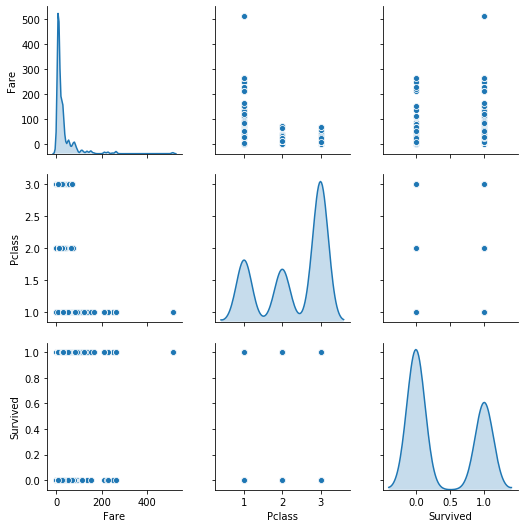

In [7]:
sns.pairplot(df[["Fare", "Pclass", "Survived"]], diag_kind="kde")

## Checking for Null Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling Numerical Columns

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df=df.drop(columns=['Cabin'])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Handling Categorical Columns 

## Filling Categorical Columns Null Values

In [46]:
df['Embarked']=df['Embarked'].fillna('Others')

## Removing  Unwanted Columns

In [13]:
print("Name Column",len(df['Name'].unique()))
print("Ticket Column",len(df['Ticket'].unique()))
print("PassengerID Column",len(df['PassengerId'].unique()))

Name Column 891
Ticket Column 681
PassengerID Column 891


In [14]:
df=df.drop(columns=['Name','Ticket','PassengerId'])
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Data Normalization

## Converting Categorical Columns

In [53]:
ordinalencoder=OrdinalEncoder()
df[['Embarked','Sex']]=ordinalencoder.fit_transform(df[['Embarked','Sex']])
df[['Embarked','Sex']]

,Embarked,Sex
0,3.0,1.0
1,0.0,0.0
2,3.0,0.0
3,3.0,0.0
4,3.0,1.0
...,...,...
886,3.0,1.0
887,3.0,0.0
888,3.0,0.0
889,0.0,1.0


## Normalizing Numerical Columns 

In [55]:
standardccaler=StandardScaler()
df[['Pclass','Age','SibSp','Parch','Fare']]=standardccaler.fit_transform(df[['Pclass','Age','SibSp','Parch','Fare']])
df[['Pclass','Age','SibSp','Parch','Fare']]

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,0.827377,0.000000,0.432793,2.008933,-0.176263
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


## Splitting Data

In [15]:
y=df.pop('Survived')
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.05, random_state=42)

## Model Implementation 

In [84]:
lgbmclassifier = LGBMClassifier()
lgbmclassifier.fit(X_train,y_train,categorical_feature=['Embarked','Sex'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [85]:
predictions=lgbmclassifier.predict(X_val)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0])

In [86]:
print(classification_report(predictions,y_val))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.78      0.88      0.82        16

    accuracy                           0.87        45
   macro avg       0.85      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45

